ANALISIS 1: EXPLORACION Y SELECCION DE DATOS

A partir del archivo Diagnostics.xlsx se realiza un analisis estadistico general de los datos.

In [5]:
!pip install neurokit2
!pip install py-ecg-detectors

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import neurokit2 as nk

import scipy.stats as stats

In [7]:
#Carga del archivo

diagnostics_path=r"C:\Users\USUARIO\Documents\UDEA\SEMESTRE X\BIOSEÑALES\PROEYCTO 1\Diagnostics.xlsx"

df=pd.read_excel(diagnostics_path)

# Visualizar las primeras filas
print(df.head())
print(df.columns)

#Informacion general
print(df.info())

#Estadisticas descriptivas
print(df.describe(include="all"))

#Verifivar valores nulos
print(df.isnull().sum())

                     FileName Rhythm       Beat  PatientAge  Gender  \
0  MUSE_20180113_171327_27000   AFIB   RBBB TWC          85    MALE   
1  MUSE_20180112_073319_29000     SB        TWC          59  FEMALE   
2  MUSE_20180111_165520_97000     SA       NONE          20  FEMALE   
3  MUSE_20180113_121940_44000     SB       NONE          66    MALE   
4  MUSE_20180112_122850_57000     AF  STDD STTC          73  FEMALE   

   VentricularRate  AtrialRate  QRSDuration  QTInterval  QTCorrected  RAxis  \
0              117         234          114         356          496     81   
1               52          52           92         432          401     76   
2               67          67           82         382          403     88   
3               53          53           96         456          427     34   
4              162         162          114         252          413     68   

   TAxis  QRSCount  QOnset  QOffset  TOffset  
0    -27        19     208      265      386  
1   

Analisis de prevalencia de arritmias

In [8]:
#Conteo de arritmias 
rhythm_counts = df['Rhythm'].value_counts()
print ("Tipos de arritmias mas frecuentes:\n",rhythm_counts)

#Conteo cruzado: Arritmia vs Genero
rhythm_gender= pd.crosstab(df['Rhythm'], df['Gender'])
print("\n Prevalencia de arrtimias por genero: \n",rhythm_gender)

#Agrupacopm por edad promedio por tipo de arritmia
rhythm_age= df.groupby('Rhythm')['PatientAge'].mean().sort_values(ascending=False)
print("\nEdad promedio por arritmia: \n",rhythm_age)

Tipos de arritmias mas frecuentes:
 SB       3889
SR       1826
AFIB     1780
ST       1568
SVT       587
AF        445
SA        399
AT        121
AVNRT      16
AVRT        8
SAAWR       7
Name: Rhythm, dtype: int64

 Prevalencia de arrtimias por genero: 
 Gender  FEMALE  MALE
Rhythm              
AF         188   257
AFIB       739  1041
AT          57    64
AVNRT       12     4
AVRT         3     5
SA         176   223
SAAWR        6     1
SB        1408  2481
SR        1024   802
ST         769   799
SVT        308   279

Edad promedio por arritmia: 
 Rhythm
AFIB     73.359551
AF       71.065169
AT       65.719008
SB       58.339676
AVNRT    57.875000
AVRT     57.500000
SVT      55.623509
ST       54.565051
SR       54.352136
SAAWR    51.142857
SA       34.746867
Name: PatientAge, dtype: float64


Seleccion del subj¿co junto para analisis posteriores

In [9]:
#Filtracion de 20 registros para cada ritmo
sb_samples =df[df['Rhythm'] == 'SB'].sample(n=20, random_state=42)
afib_samples = df[df['Rhythm'] == 'AFIB'].sample(n=20, random_state=42)

#Unir ambos subconjuntos
selected_df= pd.concat([sb_samples,afib_samples]).reset_index(drop=True)

#Verificar
print(selected_df[['FileName', 'Rhythm']])


                      FileName Rhythm
0   MUSE_20180116_124254_79000     SB
1   MUSE_20180114_073429_68000     SB
2   MUSE_20180116_173659_51000     SB
3   MUSE_20180115_131815_00000     SB
4   MUSE_20180113_172901_37000     SB
5   MUSE_20180113_173322_09000     SB
6   MUSE_20180113_125228_42000     SB
7   MUSE_20180114_065555_77000     SB
8   MUSE_20180113_080007_79000     SB
9   MUSE_20180114_125733_79000     SB
10  MUSE_20180116_121509_05000     SB
11  MUSE_20180119_173434_47000     SB
12  MUSE_20180112_170236_58000     SB
13  MUSE_20180114_130147_46000     SB
14  MUSE_20180113_171719_87000     SB
15  MUSE_20180118_132124_94000     SB
16  MUSE_20180113_074520_38000     SB
17  MUSE_20180114_121621_22000     SB
18  MUSE_20180118_181829_13000     SB
19  MUSE_20180112_135452_58000     SB
20  MUSE_20180114_135033_25000   AFIB
21  MUSE_20180113_124113_39000   AFIB
22  MUSE_20180115_120445_33000   AFIB
23  MUSE_20180118_123009_54000   AFIB
24  MUSE_20180712_160452_75000   AFIB
25  MUSE_201

Cargar señales

[[-165.33   -358.97   -121.71    270.25    -28.869  -231.16    448.39
   636.52    618.45     -7.8987 -315.16   -570.84  ]
 [-150.75   -336.81   -114.98    251.41    -23.883  -217.52    441.74
   646.47    642.56     35.389  -269.51   -532.21  ]
 [-136.69   -315.56   -108.63    233.45    -19.126  -204.36    436.06
   656.31    665.95     76.572  -225.83   -495.39  ]
 [-123.74   -296.23   -103.09    217.23    -14.815  -192.29    432.27
   666.14    688.05    113.51   -186.     -461.84  ]
 [-112.57   -279.75    -98.611   203.53    -11.213  -181.87    431.08
   676.31    708.47    144.3    -151.68   -432.56  ]
 [-103.74   -266.7     -95.229   192.84     -8.5498 -173.5     432.76
   687.31    726.98    167.55   -124.03   -408.07  ]
 [ -97.483  -257.12    -92.739   185.16     -6.9318 -167.19    437.08
   699.57    743.41    182.72   -103.39   -388.3   ]
 [ -93.571  -250.39    -90.753   179.96     -6.2779 -162.59    443.27
   713.02    757.54    190.32    -89.167  -372.63  ]
 [ -91.339  -245

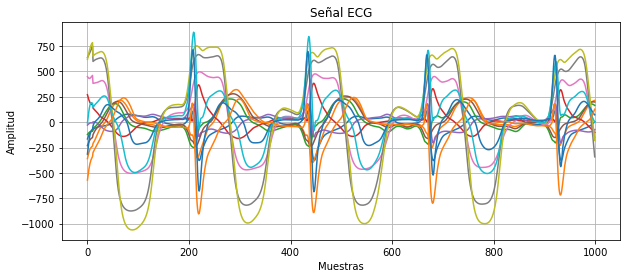

In [10]:
file_path=r"C:\Users\USUARIO\Documents\UDEA\SEMESTRE X\BIOSEÑALES\PROEYCTO 1\ECGDataDenoised\ECGDataDenoised\MUSE_20180111_155115_19000.csv"
#cargar la señal
signal=np.loadtxt(file_path, delimiter=',')

#Visualizacion de la sprimeras muestras
print(signal[:10])

#Grafica de una porcion de la señal
plt.figure(figsize=(10, 4))
plt.plot(signal[:1000]) #Muestra los primeros 1000 puntos
plt.title("Señal ECG")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

Trabajamos con la derivacion II

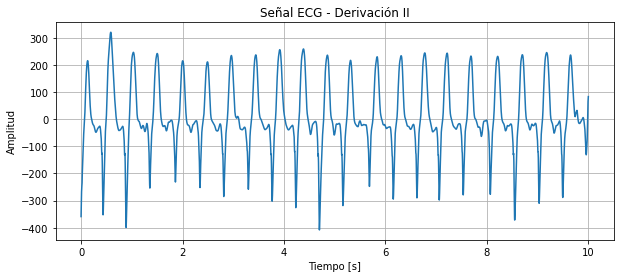

In [11]:
#Cargar todas las derivaciones como columnas
signal= pd.read_csv(file_path, header=None)

#Asignar nombres (corroborar por que lo hice viendo el ejemplo del archivo de analisis .ipynnb
signal.columns = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 
                  'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

#Tomamos derivacion II
fs=500 #frecuencia de muestreo en Hz
signal_II= signal['II'].values
tiempo= np.arange(0, signal_II.shape[0])/fs

#Visualizar
plt.figure(figsize=(10, 4))
plt.plot(tiempo, signal_II)
plt.title("Señal ECG - Derivación II")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.show()


Longitud de señal: 5000


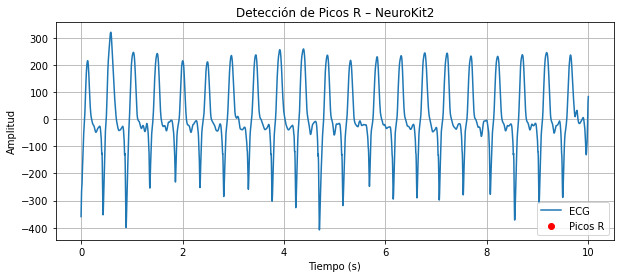

In [14]:

# Asegurar que signal_II es un array plano de una sola dimensión
signal_II = signal_II.flatten()

# Verificar longitud
print("Longitud de señal:", len(signal_II))

# Definir tiempo y frecuencia
fs = 500
tiempo = np.arange(0, len(signal_II)) / fs

# Detección de picos R
_, rpeaks = nk.ecg_peaks(signal_II, sampling_rate=fs)

# Obtener índices donde hay picos R
r_locs = np.where(rpeaks["ECG_R_Peaks"] == 1)[0]

# Graficar
plt.figure(figsize=(10, 4))
plt.plot(tiempo, signal_II, label='ECG')
plt.scatter(tiempo[r_locs], signal_II[r_locs], color='red', label='Picos R')
plt.title("Detección de Picos R – NeuroKit2")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.show()
